In [ ]:
#pip install riotwatcher

In [2]:
import requests
import json
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import pprint
import time

In [16]:
api_key = 'RGAPI-845f09e6-db70-4ada-96a6-ee58192d564a'
watcher = LolWatcher(api_key)
my_region = 'na1'

me = watcher.summoner.by_name(my_region, 'Razei')
print(me)

{'id': 'Npy4mGZooPFGzFpT3TOKEn0r-1c8PRZjbG6uy0B27kRrkfY', 'accountId': 'iF2vqbXE6wAhQyGIbfitdOtCVo7dEzYuYlIff5p_YRQKHQ', 'puuid': 'avrRl5FAtE5p-_UfX3uQOSNZSabB5hrx8z35DRfLVNxHnIopbxfqHRyazUBZOQ4lp5VrS8HEYikyhQ', 'name': 'Razei', 'profileIconId': 508, 'revisionDate': 1649537888000, 'summonerLevel': 299}


In [17]:
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
pprint.pprint(my_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': 'eacbcca2-2861-402b-b738-f684da32edbf',
  'leaguePoints': 59,
  'losses': 84,
  'queueType': 'RANKED_FLEX_SR',
  'rank': 'II',
  'summonerId': 'Npy4mGZooPFGzFpT3TOKEn0r-1c8PRZjbG6uy0B27kRrkfY',
  'summonerName': 'Razei',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 84}]


In [18]:
total_games_plays = my_ranked_stats[0]['wins'] + my_ranked_stats[0]['losses']

my_matches = []

my_matches.extend(watcher.match.matchlist_by_puuid('americas', me['puuid'], 0, 100))
pprint.pprint(my_matches)

['NA1_4273788652',
 'NA1_4273786835',
 'NA1_4273766169',
 'NA1_4273774320',
 'NA1_4273574891',
 'NA1_4273557837',
 'NA1_4272221857',
 'NA1_4272169231',
 'NA1_4269737723',
 'NA1_4269704272',
 'NA1_4263463176',
 'NA1_4263461087',
 'NA1_4263428185',
 'NA1_4263415065',
 'NA1_4261438986',
 'NA1_4261407831',
 'NA1_4261450115',
 'NA1_4259722476',
 'NA1_4260677732',
 'NA1_4260644937',
 'NA1_4260659846',
 'NA1_4259615084',
 'NA1_4259594245',
 'NA1_4258666602',
 'NA1_4258671478',
 'NA1_4258634763',
 'NA1_4258640045',
 'NA1_4258560537',
 'NA1_4258513241',
 'NA1_4257634684',
 'NA1_4257527563',
 'NA1_4257541308',
 'NA1_4257454685',
 'NA1_4257337401',
 'NA1_4256737554',
 'NA1_4256755204',
 'NA1_4256762578',
 'NA1_4256712868',
 'NA1_4256658929',
 'NA1_4256665051',
 'NA1_4255877735',
 'NA1_4255903877',
 'NA1_4255872313',
 'NA1_4255838646',
 'NA1_4255814994',
 'NA1_4255788988',
 'NA1_4255091655',
 'NA1_4255058818',
 'NA1_4255056516',
 'NA1_4255024354',
 'NA1_4255017912',
 'NA1_4252263207',
 'NA1_425224

In [19]:
#my_matches = watcher.match.matchlist_by_puuid('americas', me['puuid'])
table = []
for my_match in my_matches:
    match_detail = watcher.match.by_id('americas', my_match)

    info = {}
    team_total_damages_to_champs = 0
    for participant in match_detail["info"]["participants"]:
        if participant["summonerName"] == me['name']:
            info["ChampionName"] = participant['championName']
            info["ChampionLevel"] = participant['champLevel']
            info["Lane"] = participant['lane']
            info["Kills"] = participant['kills']
            info["Deaths"] = participant['deaths']
            info["Assists"] = participant['assists']
            info["Gold_Earned"] = participant['goldEarned']
            info["Total_Minions_Killed"] = participant['totalMinionsKilled']
            info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
            info["Win/Lose"] = participant['win']
            info["TeamBaronKills"] = participant['challenges']['teamBaronKills']
            info["FirstBloodAssist"] = participant['firstBloodAssist']
            info["FirstBloodKill"] = participant['firstBloodKill']
            info["FirstTowerAssist"] = participant['firstTowerAssist']
            info["FirstTowerKill"] = participant['firstTowerKill']
            info["InhibitorKills"] = participant['inhibitorKills']
            info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
            info["InhibitorsLost"] = participant['inhibitorsLost']
            info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken']



    for participant in match_detail["info"]["participants"]:
        if participant['win'] == info["Win/Lose"]:
            team_total_damages_to_champs += participant['totalDamageDealtToChampions']

    info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

    table.append(info)
    time.sleep(0.1)

pprint.pprint(table)


[{'Assists': 7,
  'ChampionLevel': 15,
  'ChampionName': 'Draven',
  'Deaths': 11,
  'FirstBloodAssist': True,
  'FirstBloodKill': False,
  'FirstTowerAssist': True,
  'FirstTowerKill': False,
  'Gold_Earned': 18115,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 3,
  'Kills': 16,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 38.05,
  'Total_Minions_Killed': 207,
  'Total_damages_to_champs': 25894,
  'TurretPlatesTaken': 6,
  'Win/Lose': False},
 {'Assists': 3,
  'ChampionLevel': 11,
  'ChampionName': 'Samira',
  'Deaths': 8,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 12402,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 1,
  'Kills': 10,
  'Lane': 'BOTTOM',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 37.86,
  'Total_Minions_Killed': 152,
  'Total_damages_to_champs': 20808,
  'TurretPlatesTake

  'FirstBloodKill': True,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 24260,
  'InhibitorKills': 1,
  'InhibitorTakedowns': 1,
  'InhibitorsLost': 1,
  'Kills': 38,
  'Lane': 'TOP',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 49.23,
  'Total_Minions_Killed': 138,
  'Total_damages_to_champs': 73697,
  'TurretPlatesTaken': 0,
  'Win/Lose': True},
 {'Assists': 13,
  'ChampionLevel': 17,
  'ChampionName': 'Syndra',
  'Deaths': 7,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 13913,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 1,
  'InhibitorsLost': 2,
  'Kills': 11,
  'Lane': 'TOP',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 27.44,
  'Total_Minions_Killed': 61,
  'Total_damages_to_champs': 28973,
  'TurretPlatesTaken': 0,
  'Win/Lose': False},
 {'Assists': 16,
  'ChampionLevel': 18,
  'ChampionName': 'Zed',
  'Deaths': 11,
  'First

In [35]:
df = pd.DataFrame(table)
df

,ChampionName,ChampionLevel,Lane,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,Win/Lose,TeamBaronKills,FirstBloodAssist,FirstBloodKill,FirstTowerAssist,FirstTowerKill,InhibitorKills,InhibitorTakedowns,InhibitorsLost,TurretPlatesTaken,TotalDamageDealtToChampions_Percentage
0,Draven,15,MIDDLE,16,11,7,18115,207,25894,False,0,True,False,True,False,0,0,3,6,38.05
1,Samira,11,BOTTOM,10,8,3,12402,152,20808,False,0,False,False,False,False,0,0,1,2,37.86
2,Ezreal,12,BOTTOM,17,2,3,12657,143,19685,True,0,False,False,False,False,0,1,0,3,33.74
3,Evelynn,10,NONE,6,0,4,6663,8,4553,True,0,False,False,False,True,0,0,0,2,13.41
4,Kalista,18,TOP,9,11,24,17601,95,32527,False,0,False,True,True,False,0,2,1,0,18.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kaisa,16,BOTTOM,8,7,8,14027,227,23198,False,0,False,True,False,False,0,0,2,0,22.80
96,Lissandra,16,MIDDLE,7,5,18,11450,162,22028,True,0,False,True,False,False,0,1,0,2,23.94
97,Karma,14,JUNGLE,4,1,22,9207,36,9508,True,1,False,True,False,False,0,0,0,0,9.86
98,Lux,18,MIDDLE,11,6,37,15508,77,32282,True,0,False,False,False,False,0,1,0,0,19.62


In [118]:
CookiesandCream_df = pd.read_csv("Resources/CookiesandCream_Gold.csv")
CookiesandCream_df = CookiesandCream_df.drop(['Unnamed: 0'], axis = 1)

trade_df = pd.read_csv("Resources/I_will_trade_Challenger.csv")
trade_df  = trade_df .drop(['Unnamed: 0'], axis = 1)

iron_4 = pd.read_csv("Resources/iron_4_Iron.csv")
iron_4  = iron_4.drop(['Unnamed: 0'], axis = 1)

MeleezaNoober_df = pd.read_csv("Resources/MeleezaNoober_Silver.csv")
MeleezaNoober_df = MeleezaNoober_df.drop(['Unnamed: 0'], axis = 1)

Razei_df = pd.read_csv("Resources/Razei_Platinum.csv")
Razei_df = Razei_df.drop(['Unnamed: 0'], axis = 1)

soldr_df = pd.read_csv("Resources/Soldr_Diamond.csv")
soldr_df  = soldr_df.drop(['Unnamed: 0'], axis = 1)

syptime_df = pd.read_csv("Resources/syptime_Bronze.csv")
syptime_df  = syptime_df.drop(['Unnamed: 0'], axis = 1)

xRoyal_Master_df = pd.read_csv("Resources/xRoyal_Master.csv")
xRoyal_Master_df  = xRoyal_Master_df .drop(['Unnamed: 0'], axis = 1)

Yozu_Grandmaster_df = pd.read_csv("Resources/Yozu_Grandmaster.csv")
Yozu_Grandmaster_df = Yozu_Grandmaster_df.drop(['Unnamed: 0'], axis = 1)


In [126]:
frames = [df, CookiesandCream_df, trade_df, iron_4, 
          MeleezaNoober_df, Razei_df,soldr_df, syptime_df, xRoyal_Master_df, Yozu_Grandmaster_df]
df_final = pd.concat(frames)
df_final = pd.get_dummies(df_final,
                          columns=['Lane','FirstBloodAssist', 'FirstBloodKill', 'FirstTowerKill', 'FirstTowerAssist'])
df_final['Win'] = np.where(df_final['Win/Lose'] == True, 1, 0) 
df_final = df_final.drop(['Win/Lose', 'ChampionName'], axis = 1)
df_final

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True,Win
0,15,16,11,7,18115,207,25894,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1,11,10,8,3,12402,152,20808,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,12,17,2,3,12657,143,19685,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3,10,6,0,4,6663,8,4553,0,0,0,...,0,1,0,1,0,0,1,1,0,1
4,18,9,11,24,17601,95,32527,0,0,2,...,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,14,5,3,9,11586,40,26904,2,0,1,...,0,1,0,1,0,0,1,1,0,1
85,11,7,9,7,9949,27,26613,0,0,0,...,0,1,0,1,0,1,0,0,1,0
86,15,9,8,4,14122,200,20101,1,1,2,...,0,1,0,1,0,0,1,1,0,1
87,10,9,0,1,8057,120,8875,0,0,0,...,0,1,0,1,0,0,1,1,0,1


In [122]:
import matplotlib.pyplot as plt
import numpy as np

In [127]:
y = df_final['Win']
X = df_final.drop(['Win'], axis = 1)

In [94]:
X.corr()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,FirstBloodAssist,FirstBloodKill,FirstTowerAssist,FirstTowerKill,InhibitorKills,InhibitorTakedowns,InhibitorsLost,TurretPlatesTaken,TotalDamageDealtToChampions_Percentage
ChampionLevel,1.000000,0.574497,0.379344,0.410939,0.872896,0.548503,0.711793,0.420723,0.120755,0.031628,0.029941,0.053093,0.258616,0.297122,0.232748,0.120744,0.260240
Kills,0.574497,1.000000,0.206956,0.193601,0.803306,0.388637,0.817703,0.217599,0.175110,0.113473,0.075423,0.093009,0.253332,0.246020,0.119828,0.145278,0.576841
Deaths,0.379344,0.206956,1.000000,0.241921,0.330142,0.037242,0.343166,0.056156,0.036413,-0.003756,-0.086569,-0.067852,-0.008803,-0.069762,0.398099,-0.187256,0.023595
Assists,0.410939,0.193601,0.241921,1.000000,0.318727,-0.221374,0.270613,0.255353,0.182790,-0.007183,0.065589,-0.030044,0.110272,0.343597,-0.004085,-0.053315,-0.166560
Gold_Earned,0.872896,0.803306,0.330142,0.318727,1.000000,0.639373,0.882711,0.395622,0.148678,0.084342,0.062241,0.116699,0.319282,0.319796,0.261623,0.213838,0.462272
Total_Minions_Killed,0.548503,0.388637,0.037242,-0.221374,0.639373,1.000000,0.564438,0.185814,0.013903,0.042829,-0.000957,0.088982,0.218957,0.092049,0.184704,0.262513,0.518339
Total_damages_to_champs,0.711793,0.817703,0.343166,0.270613,0.882711,0.564438,1.000000,0.257997,0.138696,0.052681,0.042536,0.074884,0.262244,0.227731,0.272238,0.128932,0.635100
TeamBaronKills,0.420723,0.217599,0.056156,0.255353,0.395622,0.185814,0.257997,1.000000,0.053309,0.043525,-0.031550,0.028353,0.222933,0.370916,-0.112941,0.077549,-0.006588
FirstBloodAssist,0.120755,0.175110,0.036413,0.182790,0.148678,0.013903,0.138696,0.053309,1.000000,-0.092865,0.027744,0.071116,0.006281,0.088669,-0.014961,0.081526,0.086261
FirstBloodKill,0.031628,0.113473,-0.003756,-0.007183,0.084342,0.042829,0.052681,0.043525,-0.092865,1.000000,-0.008871,-0.001710,0.009302,-0.016976,-0.028395,-0.015963,0.076980


In [95]:
#pip install seaborn

In [96]:
import seaborn as sn

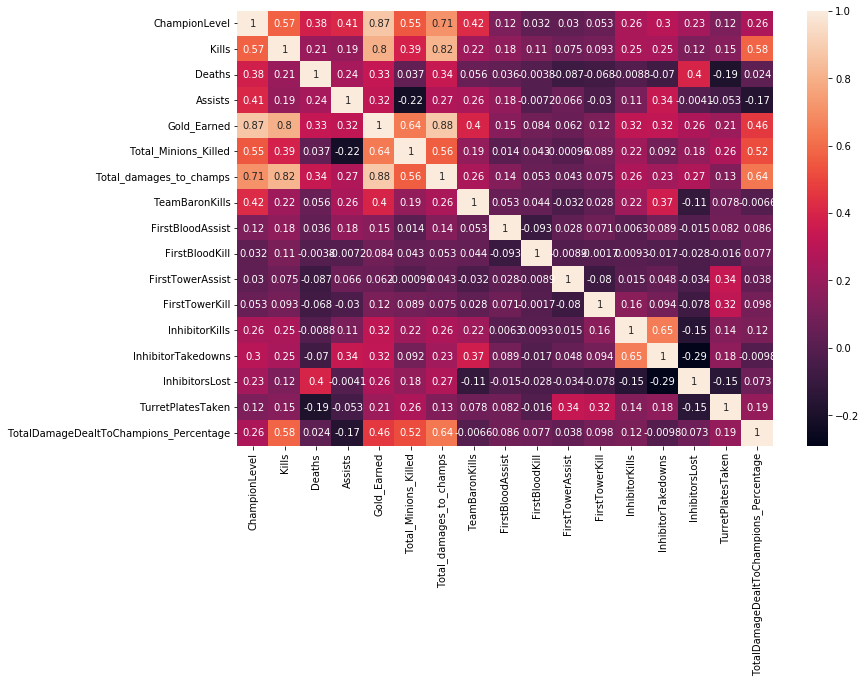

In [97]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (12,8)

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [129]:
# split dataset into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
X_train.head()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
0,15,16,11,7,18115,207,25894,0,0,0,...,0,0,0,1,1,0,1,0,0,1
46,11,6,5,4,8299,15,4715,0,0,0,...,1,0,0,1,1,0,1,0,1,0
10,11,1,6,0,6531,140,8820,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,15,15,0,4,13225,36,13725,1,0,1,...,0,0,1,0,1,0,1,0,1,0
59,12,5,6,1,8386,142,7546,0,0,0,...,0,1,1,0,0,1,1,0,1,0


In [130]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train,y_train)

/opt/anaconda3/envs/pythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [132]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Training Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8491171749598716
Training Data Score: 0.8731343283582089


In [156]:
y_pred = model.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

In [141]:
confusion_matrix(y_test, y_pred)

array([[101,  12],
       [ 22, 133]])

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       113
           1       0.92      0.86      0.89       155

    accuracy                           0.87       268
   macro avg       0.87      0.88      0.87       268
weighted avg       0.88      0.87      0.87       268



In [144]:
lane = df.groupby(['Win/Lose','Lane'])['Win/Lose'].count().unstack().fillna(0)

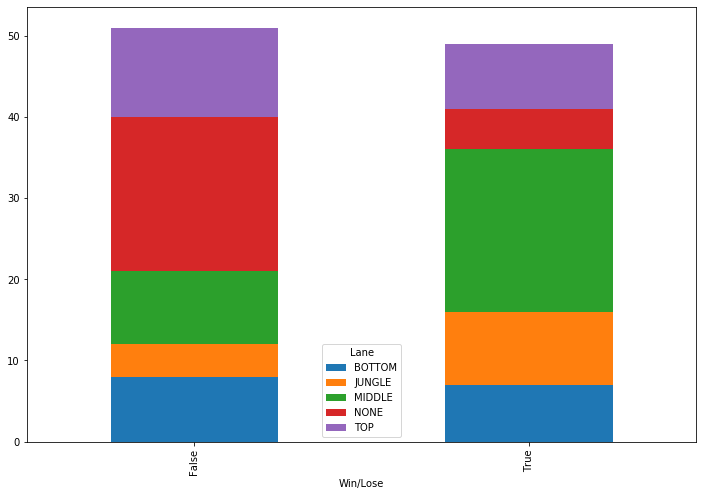

In [145]:
lane.plot(kind='bar', stacked=True)
plt.savefig("images/bar.png",bbox_inches = "tight")

## Side by Side boxplot to find relation between individual numeric variables and win/lose

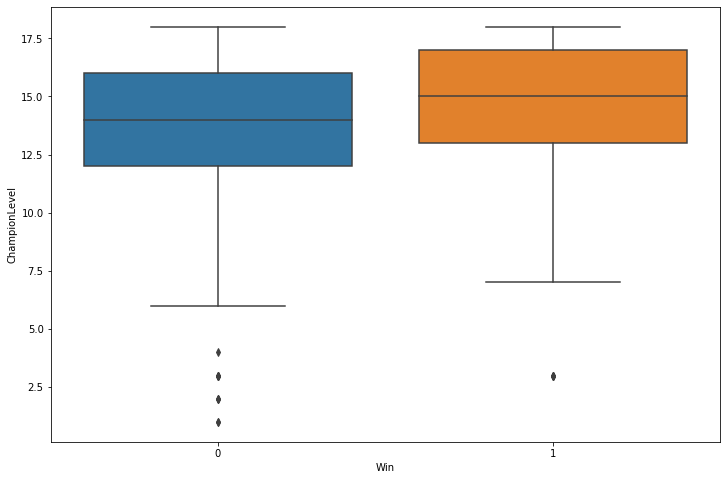

In [147]:
sn.boxplot(x='Win', y='ChampionLevel', data=df_final)
plt.savefig("images/ChampionLevel vs. Win_Lose.png",bbox_inches = "tight")

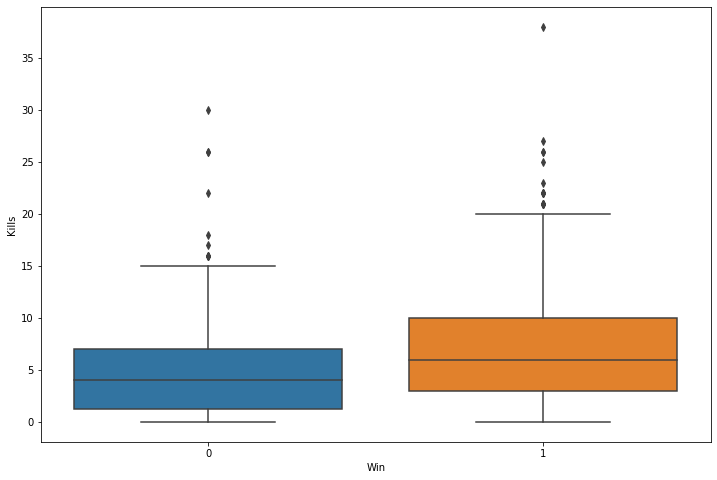

In [149]:
sn.boxplot(x='Win', y='Kills', data=df_final)
plt.savefig("images/Kills vs. Win_Lose.png",bbox_inches = "tight")

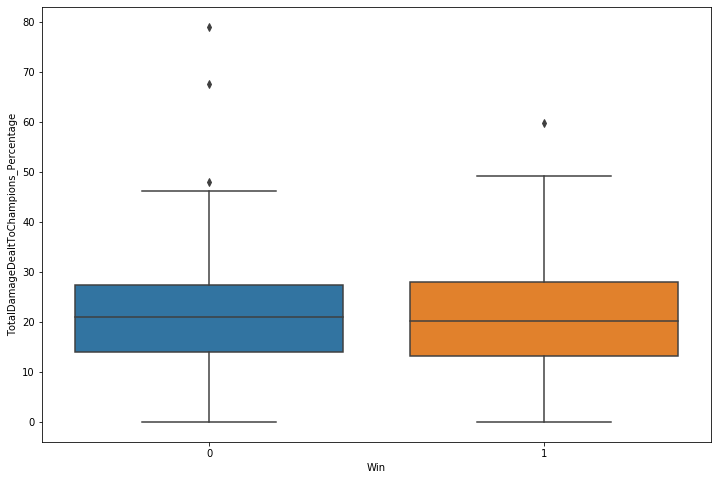

In [150]:
sn.boxplot(x='Win', y='TotalDamageDealtToChampions_Percentage', data=df_final)
plt.savefig("images/TotalDamageDealtToChampions_Percentage vs. Win_Lose.png",bbox_inches = "tight")

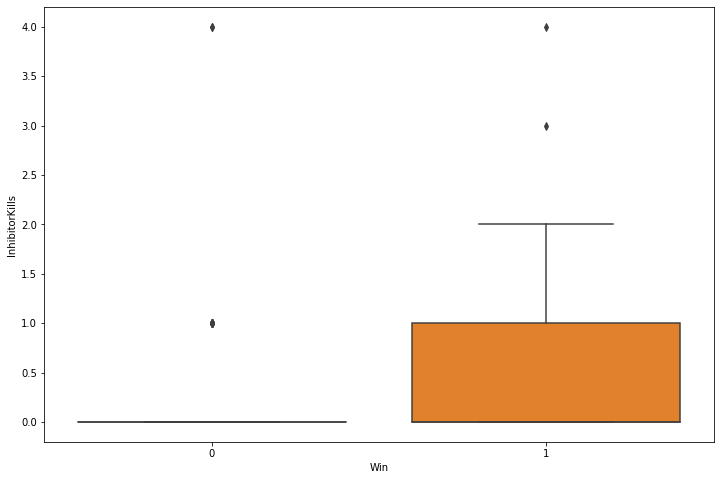

In [151]:
sn.boxplot(x='Win', y='InhibitorKills', data=df_final)
plt.savefig("images/InhibitorKills vs. Win_Lose.png",bbox_inches = "tight")

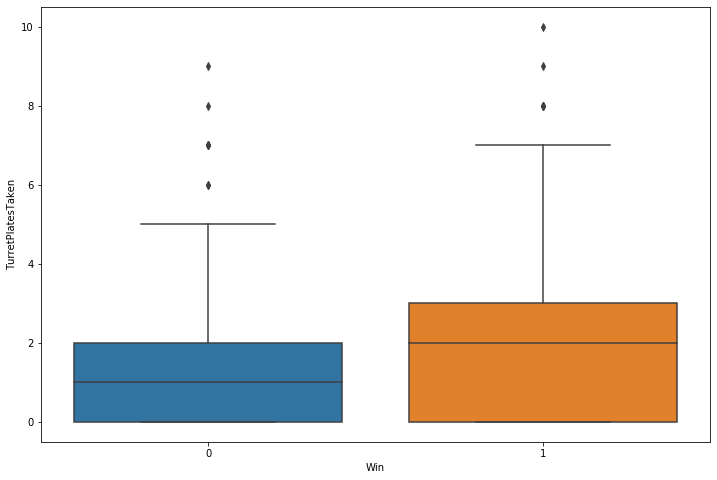

In [152]:
sn.boxplot(x='Win', y='TurretPlatesTaken', data=df_final)
plt.savefig("images/TurretPlatesTaken vs. Win_Lose.png",bbox_inches = "tight")